In [158]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable


In [159]:
# core logic
class RosenblattPerceptron:

    def __init__(self, theta, learning_rate, data, data_size, interval, eras = 0):
        self.theta = theta
        self.learning_rate = learning_rate
        self.weights = []
        self.adjustments_count = 0
        self.data = data
        self.data_size = data_size
        self.interval = interval
        self.eras = eras
        self.adjusted_in_this_era = False
        self.eras_adjusting = 0

    def reset_counters(self):
        self.adjustments_count = 0
        self.eras_adjusting = 0


    def activation_degree(self, u):
        if self.theta == 1 and u >= self.theta:
            return 1
        elif self.theta == 0 and u <= self.theta:
            return 1
        else:
            return 0

    def generate_initial_weights(self):
        #plus one for the bias
        weights = []
        for j in range(self.data_size):
           weights.append(rd.uniform(self.interval[0], self.interval[1]))
        self.weights = np.array(weights)
        print("Generated initial weights!")
        print(self.weights)

    def add_bias_to_data(self):
        self.data = np.c_[np.ones(len(self.data)) * -1 ,self.data]


    def start_training(self):
        print("starting training...")
        self.add_bias_to_data()
        self.generate_initial_weights()
        self.run_one_era()
        while self.adjusted_in_this_era:
            self.run_one_era()
        print("training ended")

    def run_one_era(self):
        self.adjusted_in_this_era = False
        for sample in self.data:
            #calc of summation
            sample_data = sample[:self.data_size]
            u = np.dot(self.weights, sample_data)
            y = self.activation_degree(u)
            y_ground_truth = sample[self.data_size]
            learning_and_error = self.learning_rate * (y - y_ground_truth)
            if learning_and_error > 0:
                delta = np.multiply(sample_data, learning_and_error)
                self.weights = np.add(self.weights, delta)
                self.adjusted_in_this_era = True
                self.adjustments_count += 1
                print("weight changed !")
                print(self.weights)
        self.eras_adjusting +=1
        print("Era of count {}. Adjustments made so far {}".format(self.eras_adjusting, self.adjustments_count))

def import_numpy_data(path, size):
    raw_data = np.fromfile(file=path, dtype=float)
    formatted_data = np.array(np.split(raw_data, len(raw_data)/size))
    return formatted_data

def plot_scatter(title, xlabel, ylabel, plot_data, straight_line_p1 = 0, straight_line_p2 = 0, plot_line = False):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for k in plot_data:
        if k[2] == 0:
            plt.scatter(k[0], k[1], c='r')
        else:
            plt.scatter(k[0], k[1], c='b')
    if plot_line:
        x = plot_data[:,0]
        y = straight_line_p1 - straight_line_p2 * x
        plt.plot(x, y, color="black")
    plt.show()

def obtain_line_by_weight(weights):
    factor1 = weights[0] / weights[2]
    factor2 = weights[1] / weights[2]
    return factor1, factor2

def benchmark_parameters(learn_rate, initial_weight_interval):
    eras_qtd = []
    adj_qtd = []
    for i in range(10):
        perceptron.reset_counters()
        perceptron.learning_rate = learn_rate
        perceptron.data = data22
        perceptron.interval = initial_weight_interval
        perceptron.start_training()
        adj_qtd.append(perceptron.adjustments_count)
        eras_qtd.append(perceptron.eras_adjusting)
    return eras_qtd, adj_qtd

<h1>2.1 Parte I - Resolvendo um problema Linearmente Separável</h1>
<h3>Lendo os dados do arquivo e plotando com as respectivas cores de classe<h3>

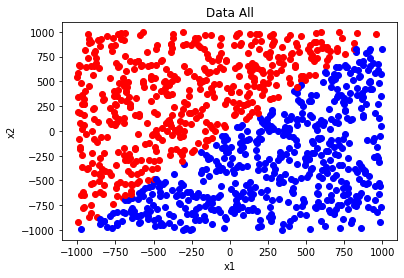

In [160]:
filename = "dataAll.txt"
init_data = import_numpy_data(filename, 3)
plot_scatter("Data All", "x1", "x2", plot_data = init_data)

<h3>Efetuando o treinamento com theta 0, learning rate 0.1 e intervalo para os pesos de (-0.5, 0.5)</h3>

In [161]:
perceptron = RosenblattPerceptron(theta=0, learning_rate=0.1, data=init_data, data_size=3, interval=[-0.5, 0.5])
perceptron.start_training()

starting training...
Generated initial weights!
[-0.12142076  0.43204043  0.21691177]
weight changed !
[ -0.22142076 -35.94679957  24.63114177]
weight changed !
[ -0.32142076  17.71225043 101.12689177]
weight changed !
[ -0.42142076 -31.47460957  84.49816177]
weight changed !
[  -0.52142076 -128.20930957   47.80278177]
weight changed !
[ -0.62142076 -88.20039957 125.69547177]
weight changed !
[  -0.72142076 -146.64331957   84.11519177]
weight changed !
[ -0.82142076 -98.25331957 139.91241177]
weight changed !
[  -0.92142076 -188.96917957   65.19909177]
weight changed !
[  -1.02142076 -142.27442957  116.86325177]
weight changed !
[  -1.12142076 -131.49774957  128.93138177]
weight changed !
[ -1.22142076 -49.83643957 211.80876177]
weight changed !
[  -1.32142076 -127.58313957  166.90283177]
weight changed !
[  -1.42142076 -223.25737957   89.88063177]
weight changed !
[  -1.52142076 -167.42164957  146.05816177]
weight changed !
[ -1.62142076 -85.77317957 235.28553177]
weight changed !
[  

<h3>Plotando o resultado, gerando a reta equação dos pesos obtidos</h3>

Quantidade de épocas do treinamento: 14, Quantidade de ajustes feitos nos pesos: 171


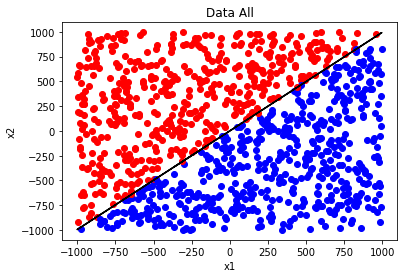

In [162]:
p1, p2 = obtain_line_by_weight(perceptron.weights)
print("Quantidade de épocas do treinamento: {}, Quantidade de ajustes feitos nos pesos: {}".format(perceptron.eras_adjusting, perceptron.adjustments_count))
plot_scatter(title="Data All", xlabel="x1", ylabel="x2", plot_data=init_data, straight_line_p1 = p1, straight_line_p2 = p2, plot_line=True)

<h1>2.2 - Experimentação </h1>

<h3> Primeiro serão plotados os exemplos desta questão </h3>

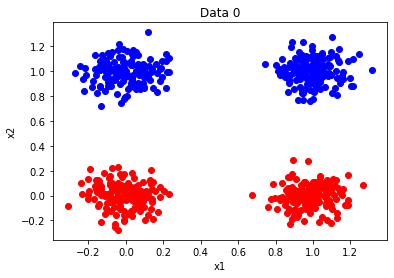

In [163]:
filename = "data0.txt"
data22 = import_numpy_data(filename, 3)
plot_scatter("Data 0", "x1", "x2", plot_data = data22)


In [164]:
learn_rates_to_try = [0.4, 0.1, 0.01]
initial_weights_to_try = [[-100,100], [-0.5, 0.5]]
lr = learn_rates_to_try[0]
initial_weights_interval = initial_weights_to_try[0]
adjustments_qtd, eras_list = benchmark_parameters(lr, initial_weights_interval)

starting training...
Generated initial weights!
[ 65.20214734 -36.37487797 -69.52754807]
weight changed !
[ 64.80214734 -36.37547545 -69.54187521]
weight changed !
[ 64.40214734 -36.37053567 -69.50087711]
weight changed !
[ 64.00214734 -36.31471727 -69.47844877]
weight changed !
[ 63.60214734 -36.34770347 -69.4155191 ]
weight changed !
[ 63.20214734 -36.35938489 -69.44877613]
weight changed !
[ 62.80214734 -36.39445617 -69.46462289]
weight changed !
[ 62.40214734 -36.42825736 -69.42577761]
weight changed !
[ 62.00214734 -36.43197917 -69.41752624]
weight changed !
[ 61.60214734 -36.51202652 -69.41449424]
weight changed !
[ 61.20214734 -36.52684553 -69.42878665]
weight changed !
[ 60.80214734 -36.49732398 -69.47765492]
weight changed !
[ 60.40214734 -36.51942068 -69.54085416]
weight changed !
[ 60.00214734 -36.54457519 -69.50937729]
weight changed !
[ 59.60214734 -36.53396303 -69.48216405]
weight changed !
[ 59.20214734 -36.54800004 -69.50425427]
weight changed !
[ 58.80214734 -36.575627

Combination of learning rate 0.4 with initial weight interval [-100, 100]


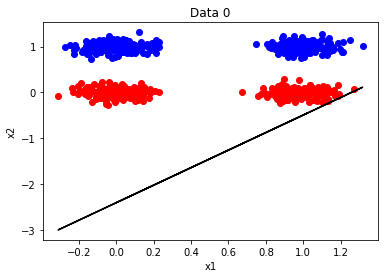

In [165]:
point1, point2 = obtain_line_by_weight(perceptron.weights)
print("Combination of learning rate {} with initial weight interval {}".format(lr, initial_weights_interval))
plot_scatter(title="Data 0", xlabel="x1", ylabel="x2", straight_line_p1 = point1, straight_line_p2 = point2, plot_data=data22, plot_line=True)

In [166]:
rna_table = PrettyTable()
rna_table.title = "Configurações"
rna_table.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Quantidade de Ajustes", "Menor número de épocas para convergência"]

In [167]:
rna_table.add_row(["n={}".format(lr),
                           "({},+{})".format(initial_weights_interval[0],initial_weights_interval[1]),
                           "{}+-{}".format(np.mean(adjustments_qtd), np.std(adjustments_qtd)),
                           "{}".format(np.min(eras_list))
                           ])

In [168]:
lr = learn_rates_to_try[0]
initial_weights_interval = initial_weights_to_try[1]
adjustments_qtd, eras_list = benchmark_parameters(lr, initial_weights_interval)

starting training...
Generated initial weights!
[-0.12227792  0.48733018 -0.27552955]
weight changed !
[-0.52227792  0.39194173 -0.23637484]
Era of count 1. Adjustments made so far 1
Era of count 2. Adjustments made so far 1
training ended
starting training...
Generated initial weights!
[-0.30808577 -0.18421496  0.38356322]
Era of count 1. Adjustments made so far 0
training ended
starting training...
Generated initial weights!
[0.19826736 0.46128964 0.08054587]
weight changed !
[-0.20173264  0.46069216  0.06621873]
Era of count 1. Adjustments made so far 1
Era of count 2. Adjustments made so far 1
training ended
starting training...
Generated initial weights!
[-0.48526231  0.17940286  0.30706711]
Era of count 1. Adjustments made so far 0
training ended
starting training...
Generated initial weights!
[ 0.3697804  -0.39497929  0.19400834]
weight changed !
[-0.0302196  -0.39557677  0.1796812 ]
weight changed !
[-0.4302196  -0.33975837  0.20210953]
Era of count 1. Adjustments made so far 2

Combination of learning rate 0.4 with initial weight interval [-0.5, 0.5]


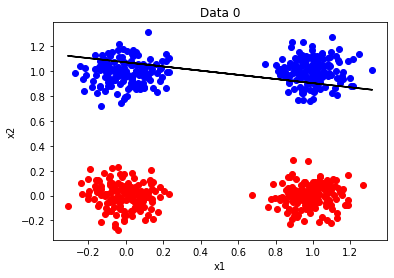

In [169]:
point1, point2 = obtain_line_by_weight(perceptron.weights)
print("Combination of learning rate {} with initial weight interval {}".format(lr, initial_weights_interval))
plot_scatter(title="Data 0", xlabel="x1", ylabel="x2", straight_line_p1 = point1, straight_line_p2 = point2, plot_data=data22, plot_line=True)

In [170]:
rna_table.add_row(["n={}".format(lr),
                           "({},+{})".format(initial_weights_interval[0],initial_weights_interval[1]),
                           "{}+-{}".format(np.mean(adjustments_qtd), np.std(adjustments_qtd)),
                           "{}".format(np.min(eras_list))
                           ])


In [171]:
lr = learn_rates_to_try[1]
initial_weights_interval = initial_weights_to_try[0]
adjustments_qtd, eras_list = benchmark_parameters(lr, initial_weights_interval)

starting training...
Generated initial weights!
[ 52.19185527 -22.16786849  36.57567502]
weight changed !
[ 52.09185527 -22.16801786  36.57209324]
weight changed !
[ 51.99185527 -22.16678291  36.58234276]
weight changed !
[ 51.89185527 -22.15282831  36.58794985]
weight changed !
[ 51.79185527 -22.16107486  36.60368227]
weight changed !
[ 51.69185527 -22.16399522  36.59536801]
weight changed !
[ 51.59185527 -22.17276304  36.59140632]
weight changed !
[ 51.49185527 -22.18121333  36.60111764]
weight changed !
[ 51.39185527 -22.18214379  36.60318048]
weight changed !
[ 51.29185527 -22.20215562  36.60393848]
weight changed !
[ 51.19185527 -22.20586038  36.60036538]
weight changed !
[ 51.09185527 -22.19847999  36.58814831]
weight changed !
[ 50.99185527 -22.20400416  36.5723485 ]
weight changed !
[ 50.89185527 -22.21029279  36.58021772]
weight changed !
[ 50.79185527 -22.20763975  36.58702103]
weight changed !
[ 50.69185527 -22.211149    36.58149847]
weight changed !
[ 50.59185527 -22.218055

Combination of learning rate 0.1 with initial weight interval [-100, 100]


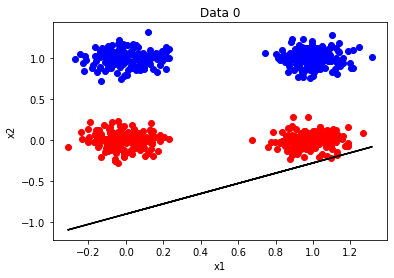

In [172]:
point1, point2 = obtain_line_by_weight(perceptron.weights)
print("Combination of learning rate {} with initial weight interval {}".format(lr, initial_weights_interval))
plot_scatter(title="Data 0", xlabel="x1", ylabel="x2", straight_line_p1 = point1, straight_line_p2 = point2, plot_data=data22, plot_line=True)

In [173]:
rna_table.add_row(["n={}".format(lr),
                           "({},+{})".format(initial_weights_interval[0],initial_weights_interval[1]),
                           "{}+-{}".format(np.mean(adjustments_qtd), np.std(adjustments_qtd)),
                           "{}".format(np.min(eras_list))
                           ])


In [174]:
lr = learn_rates_to_try[1]
initial_weights_interval = initial_weights_to_try[1]
adjustments_qtd, eras_list = benchmark_parameters(lr, initial_weights_interval)

starting training...
Generated initial weights!
[-0.49528167 -0.27843804  0.12699036]
Era of count 1. Adjustments made so far 0
training ended
starting training...
Generated initial weights!
[ 0.46523835  0.03291108 -0.27211785]
weight changed !
[ 0.36523835  0.03276172 -0.27569964]
weight changed !
[ 0.26523835  0.03399666 -0.26545011]
weight changed !
[ 0.16523835  0.04795126 -0.25984303]
weight changed !
[ 0.06523835  0.03970471 -0.24411061]
weight changed !
[-0.03476165  0.03678435 -0.25242487]
weight changed !
[-0.13476165  0.02493018 -0.23430025]
Era of count 1. Adjustments made so far 6
Era of count 2. Adjustments made so far 6
training ended
starting training...
Generated initial weights!
[-0.49329983  0.31955935  0.06796175]
Era of count 1. Adjustments made so far 0
training ended
starting training...
Generated initial weights!
[ 0.35083706 -0.11598984 -0.41418223]
weight changed !
[ 0.25083706 -0.11613921 -0.41776401]
weight changed !
[ 0.15083706 -0.11490426 -0.40751449]
wei

Combination of learning rate 0.1 with initial weight interval [-0.5, 0.5]


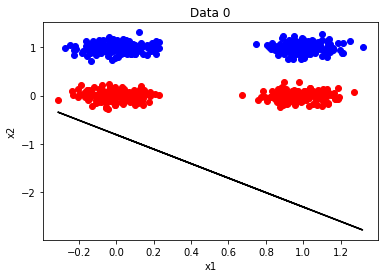

In [175]:
point1, point2 = obtain_line_by_weight(perceptron.weights)
print("Combination of learning rate {} with initial weight interval {}".format(lr, initial_weights_interval))
plot_scatter(title="Data 0", xlabel="x1", ylabel="x2", straight_line_p1 = point1, straight_line_p2 = point2, plot_data=data22, plot_line=True)

In [176]:
rna_table.add_row(["n={}".format(lr),
                           "({},+{})".format(initial_weights_interval[0],initial_weights_interval[1]),
                           "{}+-{}".format(np.mean(adjustments_qtd), np.std(adjustments_qtd)),
                           "{}".format(np.min(eras_list))
                           ])

In [177]:
lr = learn_rates_to_try[2]
initial_weights_interval = initial_weights_to_try[0]
adjustments_qtd, eras_list = benchmark_parameters(lr, initial_weights_interval)

starting training...
Generated initial weights!
[ 53.67369502  21.46719365 -97.37482059]
weight changed !
[ 53.66369502  21.46717872 -97.37517877]
weight changed !
[ 53.65369502  21.46730221 -97.37415382]
weight changed !
[ 53.64369502  21.46869767 -97.37359311]
weight changed !
[ 53.63369502  21.46787301 -97.37201987]
weight changed !
[ 53.62369502  21.46758098 -97.37285129]
weight changed !
[ 53.61369502  21.4667042  -97.37324746]
weight changed !
[ 53.60369502  21.46585917 -97.37227633]
weight changed !
[ 53.59369502  21.46576612 -97.37207005]
weight changed !
[ 53.58369502  21.46376494 -97.37199425]
weight changed !
[ 53.57369502  21.46339446 -97.37235156]
weight changed !
[ 53.56369502  21.4641325  -97.37357326]
weight changed !
[ 53.55369502  21.46358008 -97.37515324]
weight changed !
[ 53.54369502  21.46295122 -97.37436632]
weight changed !
[ 53.53369502  21.46321653 -97.37368599]
weight changed !
[ 53.52369502  21.4628656  -97.37423825]
weight changed !
[ 53.51369502  21.462174

Combination of learning rate 0.01 with initial weight interval [-100, 100]


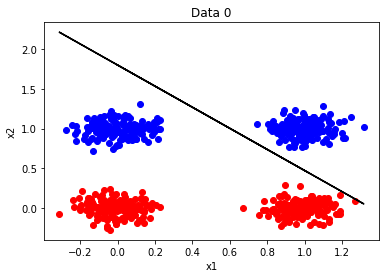

In [178]:
point1, point2 = obtain_line_by_weight(perceptron.weights)
print("Combination of learning rate {} with initial weight interval {}".format(lr, initial_weights_interval))
plot_scatter(title="Data 0", xlabel="x1", ylabel="x2", straight_line_p1 = point1, straight_line_p2 = point2, plot_data=data22, plot_line=True)

In [179]:
rna_table.add_row(["n={}".format(lr),
                           "({},+{})".format(initial_weights_interval[0],initial_weights_interval[1]),
                           "{}+-{}".format(np.mean(adjustments_qtd), np.std(adjustments_qtd)),
                           "{}".format(np.min(eras_list))
                           ])

In [180]:
lr = learn_rates_to_try[2]
initial_weights_interval = initial_weights_to_try[1]
adjustments_qtd, eras_list = benchmark_parameters(lr, initial_weights_interval)

starting training...
Generated initial weights!
[ 0.46039313 -0.28079934  0.45235428]
weight changed !
[ 0.45039313 -0.28081428  0.4519961 ]
weight changed !
[ 0.44039313 -0.28069079  0.45302105]
weight changed !
[ 0.43039313 -0.27929533  0.45358176]
weight changed !
[ 0.42039313 -0.28011998  0.455155  ]
weight changed !
[ 0.41039313 -0.28041202  0.45432357]
weight changed !
[ 0.40039313 -0.2812888   0.45392741]
weight changed !
[ 0.39039313 -0.28213383  0.45489854]
weight changed !
[ 0.38039313 -0.28222687  0.45510482]
weight changed !
[ 0.37039313 -0.28422806  0.45518062]
weight changed !
[ 0.36039313 -0.28459853  0.45482331]
weight changed !
[ 0.35039313 -0.28386049  0.4536016 ]
weight changed !
[ 0.34039313 -0.28441291  0.45202162]
weight changed !
[ 0.33039313 -0.28504177  0.45280855]
weight changed !
[ 0.32039313 -0.28477647  0.45348888]
weight changed !
[ 0.31039313 -0.2851274   0.45293662]
weight changed !
[ 0.30039313 -0.28581808  0.45246774]
weight changed !
[ 0.29039313 -0.2

Combination of learning rate 0.01 with initial weight interval [-0.5, 0.5]


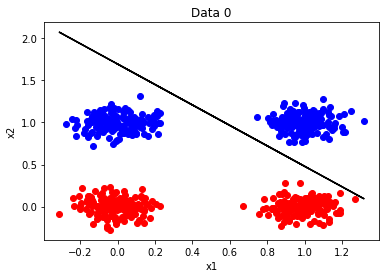

In [181]:
point1, point2 = obtain_line_by_weight(perceptron.weights)
print("Combination of learning rate {} with initial weight interval {}".format(lr, initial_weights_interval))
plot_scatter(title="Data 0", xlabel="x1", ylabel="x2", straight_line_p1 = point1, straight_line_p2 = point2, plot_data=data22, plot_line=True)

In [182]:
rna_table.add_row(["n={}".format(lr),
                           "({},+{})".format(initial_weights_interval[0],initial_weights_interval[1]),
                           "{}+-{}".format(np.mean(adjustments_qtd), np.std(adjustments_qtd)),
                           "{}".format(np.min(eras_list))
                           ])


In [183]:
print(rna_table)

+-------------------------------------------------------------------------------------------------------------------+
|                                                   Configurações                                                   |
+---------------------+--------------------+-----------------------------+------------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos |    Quantidade de Ajustes    | Menor número de épocas para convergência |
+---------------------+--------------------+-----------------------------+------------------------------------------+
|        n=0.4        |    (-100,+100)     |   0004.4+-4.17612260356422  |                    0                     |
|        n=0.4        |    (-0.5,+0.5)     | 0001.7+-0.45825756949558394 |                    0                     |
|        n=0.1        |    (-100,+100)     |  0030.4+-22.773669006113177 |                    0                     |
|        n=0.1        |    (-0.5,+0.5)     |        0001